# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [ ]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# 設定 data_path
dir_data = './data/'

In [ ]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [44]:
#1
"""
Your code here
"""
cut_rule = [0,1,3,5,app_train.CNT_CHILDREN.max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True,right=False)
app_train['CNT_CHILDREN_GROUP'].value_counts()

[0, 1)     215371
[1, 3)      87868
[3, 5)       4146
[5, 19)       124
Name: CNT_CHILDREN_GROUP, dtype: int64

In [45]:
#2-1
"""
Your code here
"""
grp = ['TARGET','CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

TARGET  CNT_CHILDREN_GROUP
0       [0, 1)                166747.010980
        [1, 3)                174590.584401
        [3, 5)                175057.123091
        [5, 19)               165127.500000
1       [0, 1)                160804.210548
        [1, 3)                176115.362720
        [3, 5)                159848.673123
        [5, 19)               192937.500000
Name: AMT_INCOME_TOTAL, dtype: float64

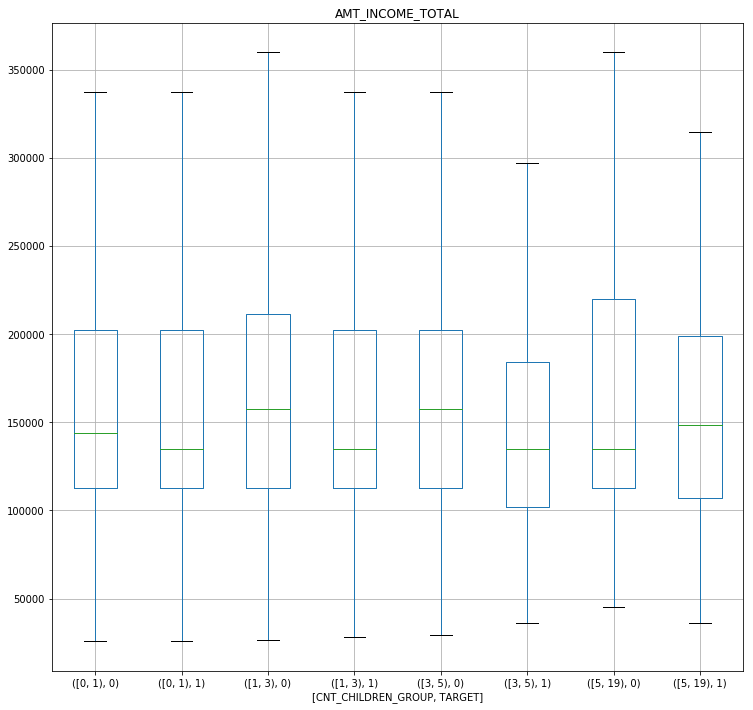

In [47]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [48]:
#3
"""
Your code here
"""
u = app_train['AMT_INCOME_TOTAL'].mean()
lo = app_train['AMT_INCOME_TOTAL'].std()
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-u)/lo)

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.142129
1,270000.0,0.426791
2,67500.0,-0.427195
3,135000.0,-0.142533
4,121500.0,-0.199466
